In [7]:
import os
import sys
# Get current working directory and project root directory
cwd = os.getcwd()
rd = os.path.join(cwd.split('stochastic-travel-demand-modelling/', 1)[0])
if not rd.endswith('stochastic-travel-demand-modelling'):
    rd = os.path.join(cwd.split('stochastic-travel-demand-modelling/', 1)[0],'stochastic-travel-demand-modelling')
sys.path.append(rd)

In [2]:
from models.urban_model import UrbanModel
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

# Define global variables

In [3]:
# Define dataset directory
dataset = 'retail'
# Define mode (stochastic/determinstic)
mode = 'stochastic'
# Instantiate UrbanModel
um = UrbanModel(mode,dataset,rd)

# Setup 2D model

In [9]:
um.cost_matrix = um.cost_matrix[:,:2]/um.cost_matrix[:,:2].sum()
um.N, um.M = np.shape(um.cost_matrix)

alpha = 0.5
beta = 1000
delta = 0.3/um.M
gamma = 20.
kappa = 1. + delta*um.M
theta = np.array([alpha, beta, delta, gamma, kappa])

# Run plots

In [10]:
plot_n = 100
space0 = -4.
space1 = .5
space = np.linspace(space0,space1, plot_n)
xx, yy = np.meshgrid(space, space)
zz = np.zeros((plot_n, plot_n))

alpha_values = np.array([.5, 1., 1.5, 2.])

# Plot

100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


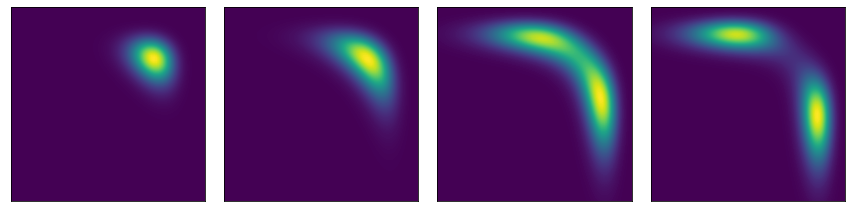

--- 5.660186767578125 seconds ---


In [13]:
start_time = time.time()

plt.figure(figsize=(12,3))
for k in tqdm(range(len(alpha_values))):
    plt.subplot(1, 4, k+1)    
    theta[0] = alpha_values[k]

    for i in range(plot_n):
        for j in range(plot_n):
            temp = np.array([xx[i, j], yy[i, j]])
            zz[i, j] = np.exp(-um.potential_value(temp,theta)[0])

    plt.contourf(xx, yy, zz, 300)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim([space0, space1])
    plt.ylim([space0, space1])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))